In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')

In [ ]:
print(df.head())

       market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005      2350       404       493       446    PB   
1  ABOHAR(PB)  January  2006       900       487       638       563    PB   
2  ABOHAR(PB)  January  2010       790      1283      1592      1460    PB   
3  ABOHAR(PB)  January  2011       245      3067      3750      3433    PB   
4  ABOHAR(PB)  January  2012      1035       523       686       605    PB   

     city          date  
0  ABOHAR  January-2005  
1  ABOHAR  January-2006  
2  ABOHAR  January-2010  
3  ABOHAR  January-2011  
4  ABOHAR  January-2012  


In [ ]:
num_cols = ['quantity', 'priceMin', 'priceMax', 'priceMod']
cat_cols = ['market', 'state', 'city']

In [ ]:
df.drop(columns=['date'], inplace=True)

In [ ]:
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   market    10227 non-null  object 
 1   month     10227 non-null  object 
 2   year      10227 non-null  int64  
 3   quantity  10227 non-null  float64
 4   priceMin  10227 non-null  float64
 5   priceMax  10227 non-null  float64
 6   priceMod  10227 non-null  float64
 7   state     10227 non-null  object 
 8   city      10227 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 719.2+ KB
None
       market    month  year  quantity  priceMin  priceMax  priceMod state  \
0  ABOHAR(PB)  January  2005    2350.0     404.0     493.0     446.0    PB   
1  ABOHAR(PB)  January  2006     900.0     487.0     638.0     563.0    PB   
2  ABOHAR(PB)  January  2010     790.0    1283.0    1592.0    1460.0    PB   
3  ABOHAR(PB)  January  2011     245.0    3067.0    3750.0    3433.0    PB   
4  A

In [ ]:
df.to_csv('preprocessed_market_predcition.csv', index=False)

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('preprocessed_market_predcition.csv')

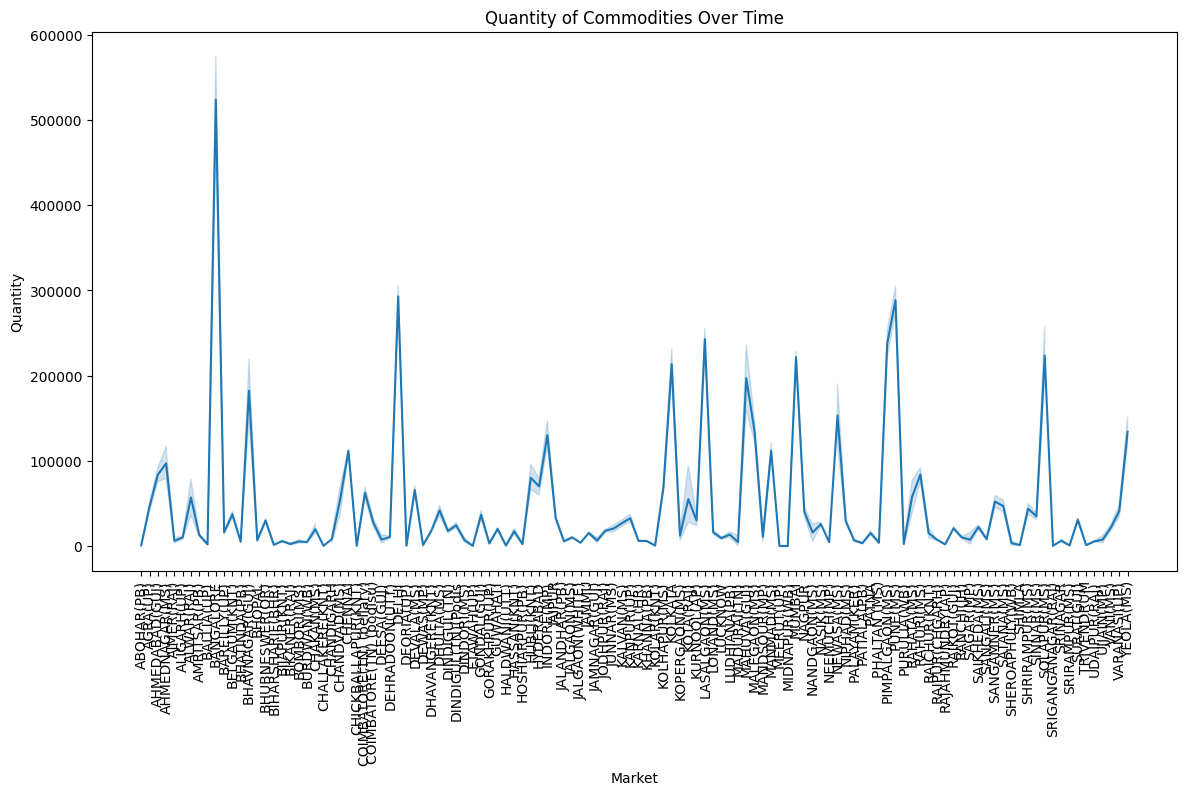

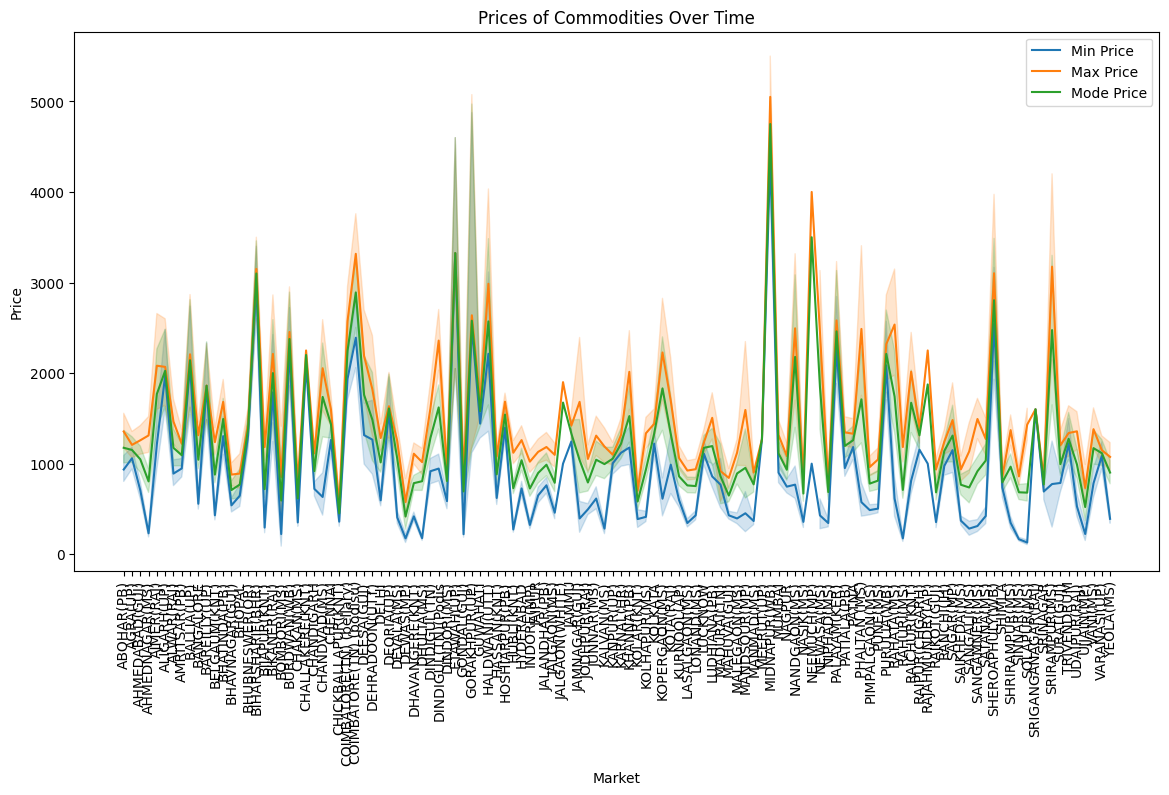

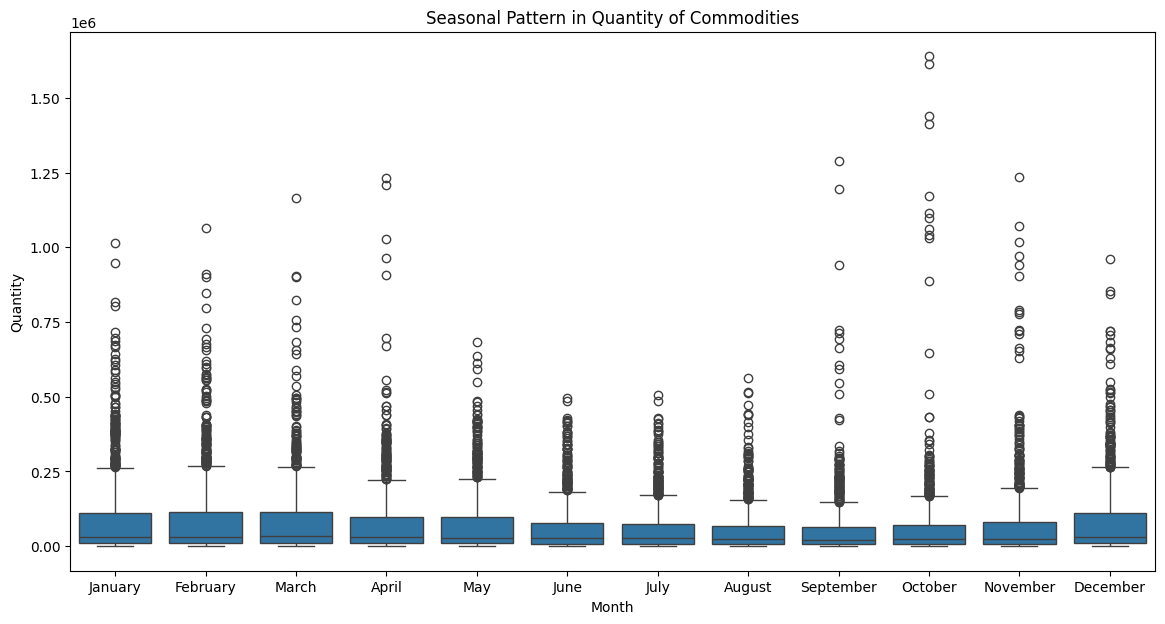

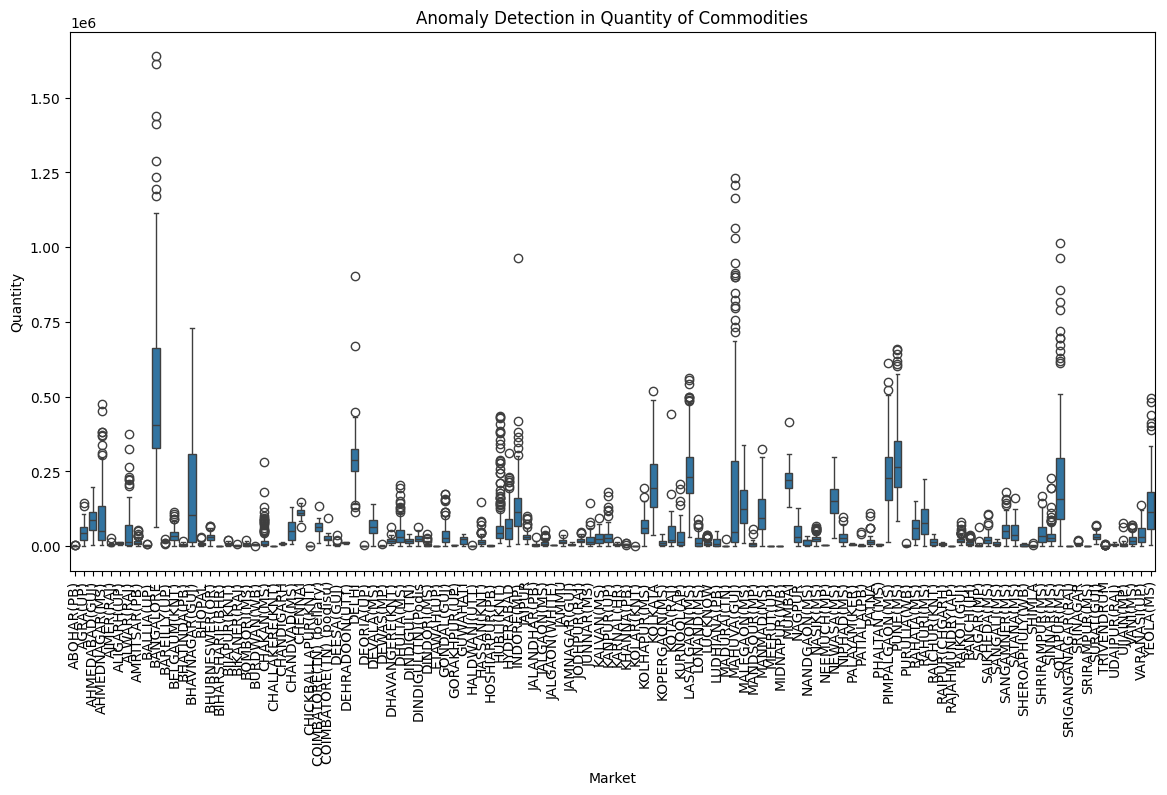

In [ ]:
# Convert 'market' back to categorical for plotting
df['market'] = df['market'].astype('category')

# Plotting the quantity over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='market', y='quantity')
plt.title('Quantity of Commodities Over Time')
plt.xlabel('Market')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

# Plotting the priceMin, priceMax, and priceMod over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='market', y='priceMin', label='Min Price')
sns.lineplot(data=df, x='market', y='priceMax', label='Max Price')
sns.lineplot(data=df, x='market', y='priceMod', label='Mode Price')
plt.title('Prices of Commodities Over Time')
plt.xlabel('Market')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.show()



# Plotting the seasonal pattern for quantity
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='quantity', data=df)
plt.title('Seasonal Pattern in Quantity of Commodities')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

# Detecting anomalies (example using quantity)
plt.figure(figsize=(14, 7))
sns.boxplot(x='market', y='quantity', data=df)
plt.title('Anomaly Detection in Quantity of Commodities')
plt.xlabel('Market')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remove unnecessary columns
df.drop(columns=['city', 'state'], inplace=True)

# Handle missing values
num_cols = ['quantity', 'priceMin', 'priceMax', 'priceMod']
cat_cols = ['market', 'month', 'year']

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Convert month to numeric if it is not already
if df['month'].dtype == object:
    df['month'] = df['month'].str.capitalize()
    month_mapping = {month: idx for idx, month in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 1)}
    df['month'] = df['month'].map(month_mapping)

# Convert year to numeric
df['year'] = df['year'].astype(int)

print("Data after preprocessing:")
print(df.head())

# Create lagged features
def create_lagged_features(df, lag_features, n_lags):
    for feature in lag_features:
        for lag in range(1, n_lags + 1):
            df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
    return df

# Create rolling statistics features
def create_rolling_features(df, rolling_features, window_sizes):
    for feature in rolling_features:
        for window in window_sizes:
            df[f'{feature}_rolling_mean_{window}'] = df[feature].rolling(window=window).mean()
            df[f'{feature}_rolling_std_{window}'] = df[feature].rolling(window=window).std()
    return df

# Add seasonal indicators
def add_seasonal_indicators(df):
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

# Apply feature engineering functions
lag_features = ['quantity', 'priceMin', 'priceMax', 'priceMod']
rolling_features = ['quantity', 'priceMin', 'priceMax', 'priceMod']
n_lags = 3
window_sizes = [3, 6, 12]

df = create_lagged_features(df, lag_features, n_lags)
df = create_rolling_features(df, rolling_features, window_sizes)
df = add_seasonal_indicators(df)

# Drop rows with NaN values created by lagging and rolling operations
df.dropna(inplace=True)

print("Data after feature engineering:")
print(df.head())


Data after preprocessing:
       market  month  year  quantity  priceMin  priceMax  priceMod  \
0  ABOHAR(PB)      1  2005    2350.0     404.0     493.0     446.0   
1  ABOHAR(PB)      1  2006     900.0     487.0     638.0     563.0   
2  ABOHAR(PB)      1  2010     790.0    1283.0    1592.0    1460.0   
3  ABOHAR(PB)      1  2011     245.0    3067.0    3750.0    3433.0   
4  ABOHAR(PB)      1  2012    1035.0     523.0     686.0     605.0   

   quantity_lag1  quantity_lag2  quantity_lag3  ...  priceMax_rolling_mean_6  \
0            NaN            NaN            NaN  ...                      NaN   
1         2350.0            NaN            NaN  ...                      NaN   
2          900.0         2350.0            NaN  ...                      NaN   
3          790.0          900.0         2350.0  ...                      NaN   
4          245.0          790.0          900.0  ...                      NaN   

   priceMax_rolling_std_6  priceMax_rolling_mean_12  priceMax_rolling_st

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MarketPricePrediction.csv')


# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train ARIMA model
arima_model = ARIMA(train['quantity'], order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions
arima_pred = arima_result.forecast(steps=len(test))
arima_mae = mean_absolute_error(test['quantity'], arima_pred)

print(f'ARIMA MAE: {arima_mae}')


ARIMA MAE: 46550.34785806395


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA model
sarima_model = SARIMAX(train['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions
sarima_pred = sarima_result.forecast(steps=len(test))
sarima_mae = mean_absolute_error(test['quantity'], sarima_pred)

print(f'SARIMA MAE: {sarima_mae}')

SARIMA MAE: 52889.52564581419


In [ ]:
!pip install Prophet



In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()
prophet_df.rename(columns={'date': 'ds', 'quantity': 'y'}, inplace=True)

# Split data into training and test sets
prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

# Train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Make predictions
future = prophet_model.make_future_dataframe(periods=len(prophet_test), freq='M')
forecast = prophet_model.predict(future)

# Extract the predictions for the test period
prophet_pred = forecast.set_index('ds').loc[prophet_test['ds']]['yhat']
prophet_mae = mean_absolute_error(prophet_test['y'], prophet_pred)

print(f'Prophet MAE: {prophet_mae}')


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6og2jou/qo1ffcon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6og2jou/prefer1k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdst

Prophet MAE: 69377.3629603703


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Prepare the data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['quantity']].values)

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
lstm_train_predict = lstm_model.predict(X_train)
lstm_test_predict = lstm_model.predict(X_test)

# Invert predictions
lstm_train_predict = scaler.inverse_transform(lstm_train_predict)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

# Calculate MAE
lstm_mae = mean_absolute_error(scaler.inverse_transform(Y_test.reshape(-1, 1)), lstm_test_predict)

print(f'LSTM MAE: {lstm_mae}')


Epoch 1/20
8171/8171 - 41s - loss: 0.0020 - 41s/epoch - 5ms/step
Epoch 2/20
8171/8171 - 35s - loss: 0.0018 - 35s/epoch - 4ms/step
Epoch 3/20
8171/8171 - 37s - loss: 0.0017 - 37s/epoch - 4ms/step
Epoch 4/20
8171/8171 - 36s - loss: 0.0017 - 36s/epoch - 4ms/step
Epoch 5/20
8171/8171 - 35s - loss: 0.0017 - 35s/epoch - 4ms/step
Epoch 6/20
8171/8171 - 37s - loss: 0.0017 - 37s/epoch - 5ms/step
Epoch 7/20
8171/8171 - 35s - loss: 0.0016 - 35s/epoch - 4ms/step
Epoch 8/20
8171/8171 - 36s - loss: 0.0016 - 36s/epoch - 4ms/step
Epoch 9/20
8171/8171 - 36s - loss: 0.0016 - 36s/epoch - 4ms/step
Epoch 10/20
8171/8171 - 36s - loss: 0.0016 - 36s/epoch - 4ms/step
Epoch 11/20
8171/8171 - 36s - loss: 0.0016 - 36s/epoch - 4ms/step
Epoch 12/20
8171/8171 - 35s - loss: 0.0016 - 35s/epoch - 4ms/step
Epoch 13/20
8171/8171 - 37s - loss: 0.0016 - 37s/epoch - 4ms/step
Epoch 14/20
8171/8171 - 35s - loss: 0.0016 - 35s/epoch - 4ms/step
Epoch 15/20
8171/8171 - 36s - loss: 0.0016 - 36s/epoch - 4ms/step
Epoch 16/20
8171/81

In [ ]:
print(f'ARIMA MAE: {arima_mae}')
print(f'SARIMA MAE: {sarima_mae}')
print(f'Prophet MAE: {prophet_mae}')
print(f'LSTM MAE: {lstm_mae}')

best_model = min(
    ('ARIMA', arima_mae),
    ('SARIMA', sarima_mae),
    ('Prophet', prophet_mae),
    ('LSTM', lstm_mae),
    key=lambda x: x[1]
)
print(f'The best model is: {best_model[0]} with MAE: {best_model[1]}')


ARIMA MAE: 46550.34785806395
SARIMA MAE: 52889.52564581419
Prophet MAE: 69377.3629603703
LSTM MAE: 39349.783192608906
The best model is: LSTM with MAE: 39349.783192608906


In [ ]:
# Fine-tune LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=2)

# Make predictions on test set
lstm_test_predict = lstm_model.predict(X_test)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
lstm_mae = mean_absolute_error(scaler.inverse_transform(Y_test.reshape(-1, 1)), lstm_test_predict)

print(f'Fine-tuned LSTM MAE: {lstm_mae}')


Epoch 1/50
128/128 - 10s - loss: 0.0022 - 10s/epoch - 78ms/step
Epoch 2/50
128/128 - 1s - loss: 0.0017 - 943ms/epoch - 7ms/step
Epoch 3/50
128/128 - 2s - loss: 0.0017 - 2s/epoch - 13ms/step
Epoch 4/50
128/128 - 1s - loss: 0.0016 - 1s/epoch - 11ms/step
Epoch 5/50
128/128 - 1s - loss: 0.0016 - 1s/epoch - 11ms/step
Epoch 6/50
128/128 - 1s - loss: 0.0016 - 996ms/epoch - 8ms/step
Epoch 7/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 8ms/step
Epoch 8/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 9ms/step
Epoch 9/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 9ms/step
Epoch 10/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 8ms/step
Epoch 11/50
128/128 - 1s - loss: 0.0015 - 941ms/epoch - 7ms/step
Epoch 12/50
128/128 - 1s - loss: 0.0015 - 996ms/epoch - 8ms/step
Epoch 13/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 8ms/step
Epoch 14/50
128/128 - 1s - loss: 0.0015 - 971ms/epoch - 8ms/step
Epoch 15/50
128/128 - 1s - loss: 0.0015 - 963ms/epoch - 8ms/step
Epoch 16/50
128/128 - 2s - loss: 0.0015 - 2s/epoch - 12

In [ ]:
# Validation on unseen data
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(100, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=2)

# Make predictions on test set
lstm_test_predict = lstm_model.predict(X_test)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)
lstm_mae = mean_absolute_error(scaler.inverse_transform(Y_test.reshape(-1, 1)), lstm_test_predict)

print(f'Fine-tuned LSTM MAE on unseen data: {lstm_mae}')


Epoch 1/50
128/128 - 4s - loss: 0.0022 - 4s/epoch - 32ms/step
Epoch 2/50
128/128 - 1s - loss: 0.0017 - 631ms/epoch - 5ms/step
Epoch 3/50
128/128 - 1s - loss: 0.0016 - 644ms/epoch - 5ms/step
Epoch 4/50
128/128 - 1s - loss: 0.0015 - 638ms/epoch - 5ms/step
Epoch 5/50
128/128 - 1s - loss: 0.0016 - 636ms/epoch - 5ms/step
Epoch 6/50
128/128 - 1s - loss: 0.0016 - 902ms/epoch - 7ms/step
Epoch 7/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 11ms/step
Epoch 8/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 9ms/step
Epoch 9/50
128/128 - 1s - loss: 0.0016 - 1s/epoch - 11ms/step
Epoch 10/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 10ms/step
Epoch 11/50
128/128 - 1s - loss: 0.0015 - 987ms/epoch - 8ms/step
Epoch 12/50
128/128 - 1s - loss: 0.0015 - 1s/epoch - 8ms/step
Epoch 13/50
128/128 - 1s - loss: 0.0015 - 956ms/epoch - 7ms/step
Epoch 14/50
128/128 - 1s - loss: 0.0016 - 987ms/epoch - 8ms/step
Epoch 15/50
128/128 - 1s - loss: 0.0015 - 994ms/epoch - 8ms/step
Epoch 16/50
128/128 - 1s - loss: 0.0015 - 990ms/